In [20]:
import numpy as np
from scipy.stats import pearsonr, zscore
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import csv
import json

In [50]:
def generateDataset(rho,n=100):
    r = np.array([[1, rho],[rho, 1]])
    y = np.random.multivariate_normal([0.0,0.0], r, size=n)
#     print(y)
#     y = y - np.mean(y,axis=0)
#     print(np.mean(y,axis=0))
    x = y[:,0]
    y = y[:,1]
    
    # ensure centering
    x = x - np.mean(x)
    y = y - np.mean(y)
    
    # ensure equal variance
    
    
    
    plt.scatter(x,y)
    plt.show()
    d = [{"x":i,"y":j} for i,j in zip(x,y)]
    calcRho = pearsonr(x,y)
    return({"data":d,"N":n,"rho":rho,"calcRho":calcRho[0]})

In [26]:
rho = 0
n = 10
r = np.array([[1, rho],[rho, 1]])
y = np.random.multivariate_normal([0.0,0.0], r, size=n)

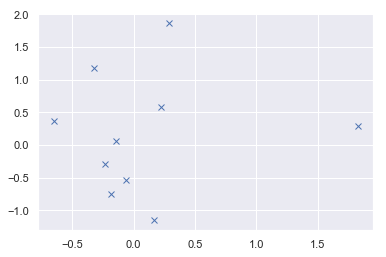

In [27]:
plt.plot(y[:,0], y[:,1], 'x')

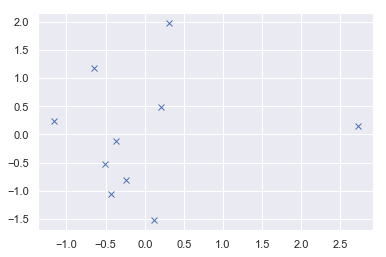

In [28]:
zs = zscore(y, axis=0)
plt.plot(zs[:,0], zs[:,1], 'x')

In [40]:
with open("variables.csv",encoding="UTF-8") as csvFile:
    csvData = [i for i in csv.DictReader(csvFile)]

In [52]:
csvDf = pd.read_csv("variables.csv")

In [53]:
csvDf

,Unit of observation,X,Y,True relationship,Political?,rho,set
0,diamonds,Weight,Price,Strongly positive,No,0.9,1
1,cities,Temperature,Crime rate,Positive,No,0.4,1
2,people,Yearly income,Height,None,No,0.0,1
3,people,Exercise amount,Body weight,Negative,No,-0.4,1
4,cities,Temperature,Sales of Mittens,Strongly Negative,No,-0.9,1
5,countries,Government spending,Budget deficit,Strongly positive,Yes,0.9,2
6,countries,Immigrant population,Economic growth,Positive,Yes,0.4,2
7,cities,Income tax rate,Poverty rate,None,Yes,0.0,2
8,companies,Labor union participation,Corporate profits,Negative,Yes,-0.4,2
9,cities,Vaccination rate,Rate of illness,Strongly Negative,Yes,-0.9,2


0.9


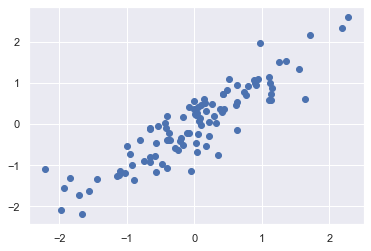

0.4


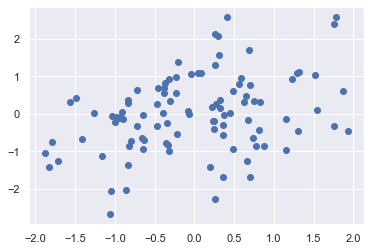

0.0


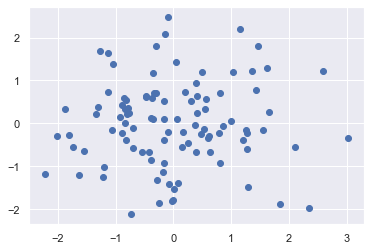

-0.4


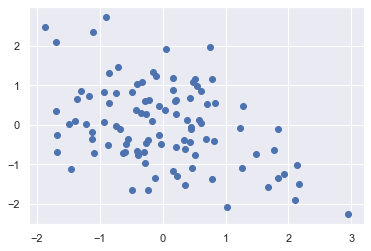

-0.9


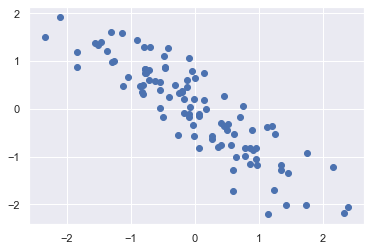

0.9


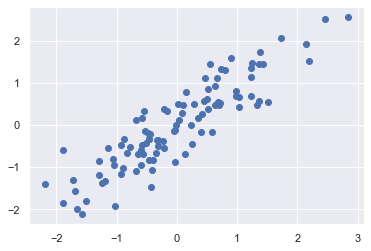

0.4


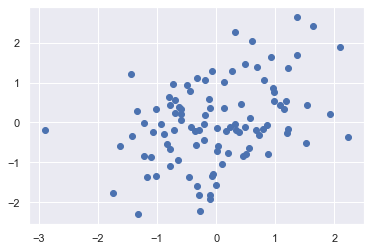

0.0


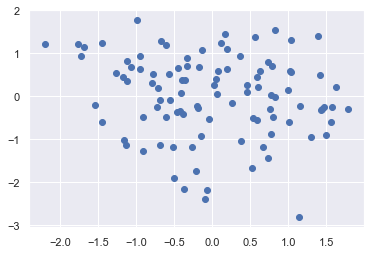

-0.4


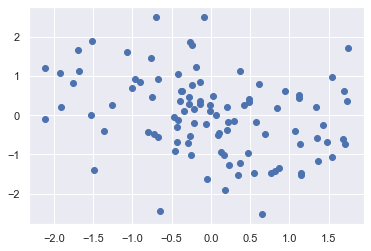

-0.9


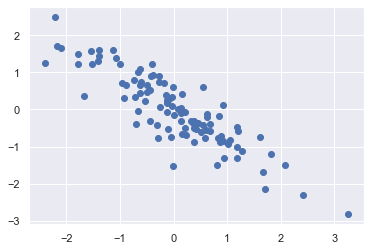

In [54]:
allData = {}
for idx,row in csvDf.iterrows():
    rho = float(row["rho"])
    print(rho)
    vars = (row["X"],row["Y"])
    data = generateDataset(rho)
    key = "_".join([i for i in vars])
    setID = row["set"]
    political = row["Political?"]
    unit = row["Unit of observation"]
    allData[key] = {
        "data":data,
        "vars":vars,
        "rho": rho,
        "set": setID,
        "political":political,
        "unitt" : unit
    }

In [27]:
allData.keys()

dict_keys(['Weight_Price', 'Temperature_Crime rate', 'Yearly income_Height', 'Exercise amount_Body weight', 'Temperature_Sales of Mittens', 'Government spending_Budget deficit', 'Immigrant population_Economic growth', 'Income tax rate_Poverty rate', 'Labor union participation_Corporate profits', 'Vaccination rate_Rate of illness'])

In [55]:
with open("finalSimData.json","w") as jsonFile:
    jsonFile.write(json.dumps(allData))

In [6]:
with open("finalSimData.json","r") as jsonFile:
    allData = json.loads(jsonFile.read())

x   -3.073816
y   -3.018959
dtype: float64
x    2.478244
y    2.669139
dtype: float64


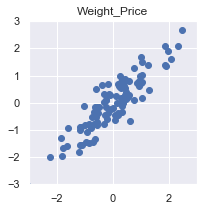

x   -2.879369
y   -2.165595
dtype: float64
x    2.633042
y    2.332949
dtype: float64


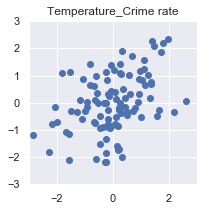

x   -2.321919
y   -2.381689
dtype: float64
x    2.772746
y    2.361166
dtype: float64


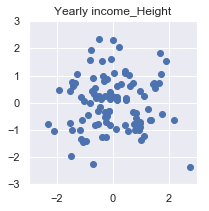

x   -1.699841
y   -2.369101
dtype: float64
x    1.999351
y    2.513155
dtype: float64


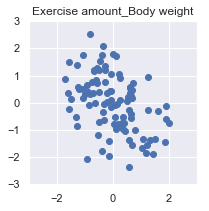

x   -2.586022
y   -2.782663
dtype: float64
x    2.523757
y    2.709842
dtype: float64


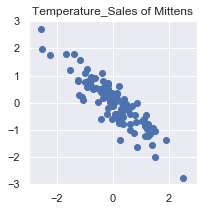

x   -2.759853
y   -2.595186
dtype: float64
x    2.745058
y    2.726582
dtype: float64


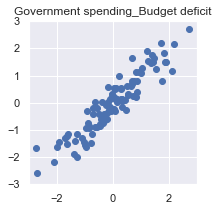

x   -2.208593
y   -2.526207
dtype: float64
x    2.212015
y    3.024730
dtype: float64


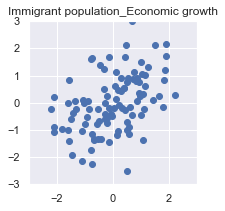

x   -2.908244
y   -1.857379
dtype: float64
x    2.179959
y    3.143547
dtype: float64


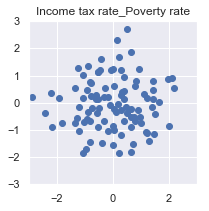

x   -2.265512
y   -2.613947
dtype: float64
x    2.400244
y    2.165641
dtype: float64


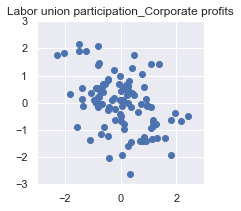

x   -2.593951
y   -2.082805
dtype: float64
x    2.201112
y    2.647624
dtype: float64


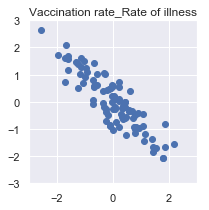

In [39]:
for i, var_name in enumerate(allData.keys()):
    df = pd.DataFrame(allData[var_name]['data']['data'])
    
    print(df.min())
    print(df.max())
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax.scatter(df.x, df.y)
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    ax.set_title(var_name)
    plt.show()

# Test data

-1.0


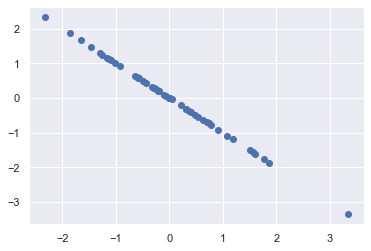

-0.9


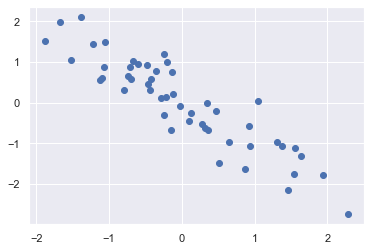

-0.8


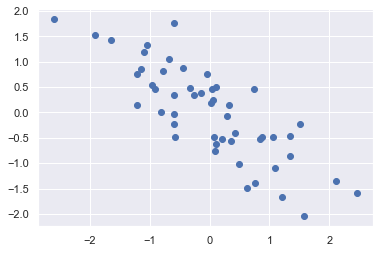

-0.7


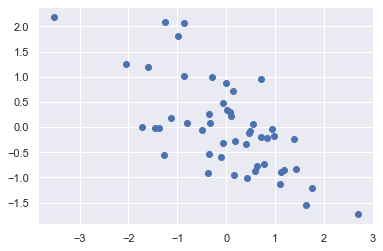

-0.6


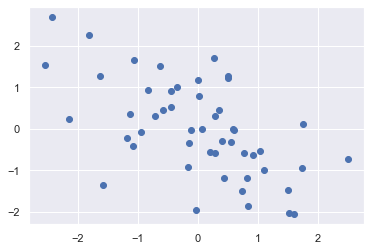

-0.5


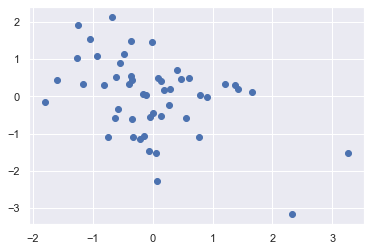

-0.4


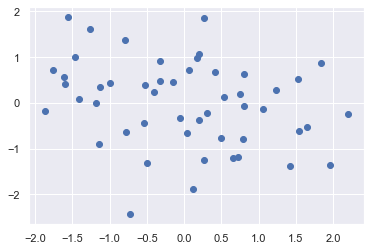

-0.3


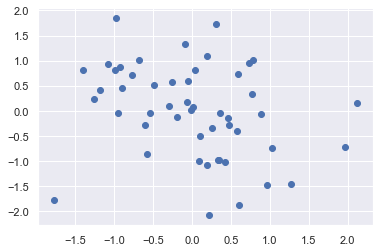

-0.2


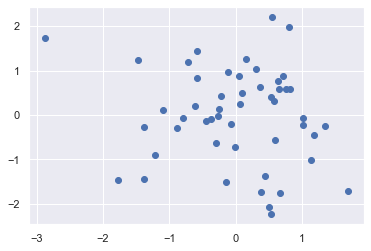

-0.1


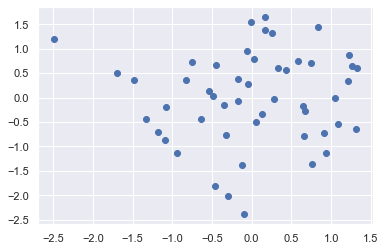

0.0


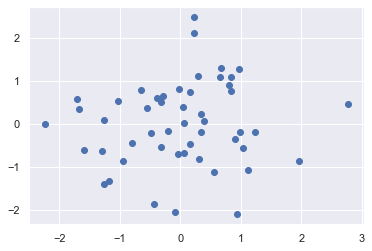

0.1


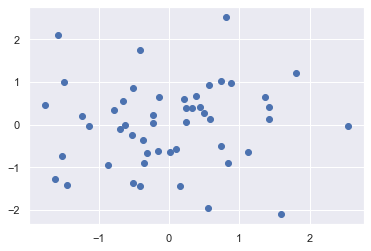

0.2


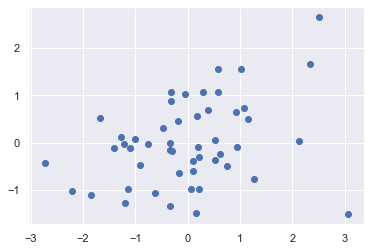

0.3


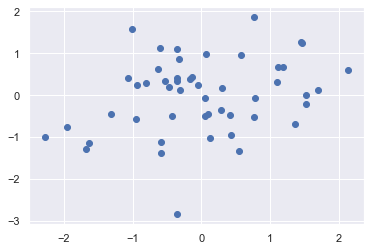

0.4


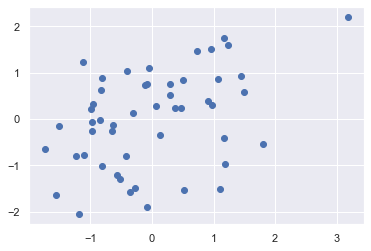

0.5


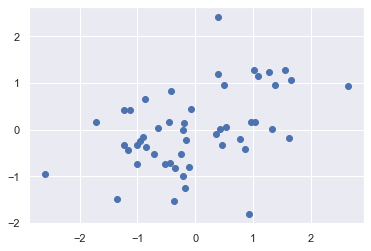

0.6


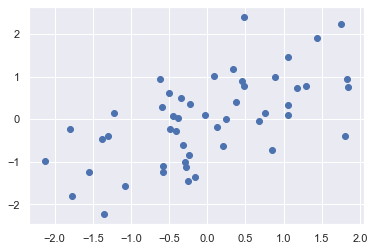

0.7


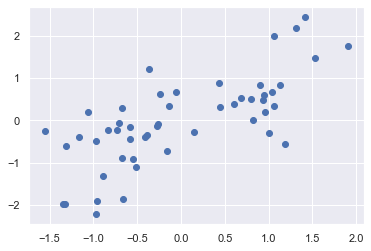

0.8


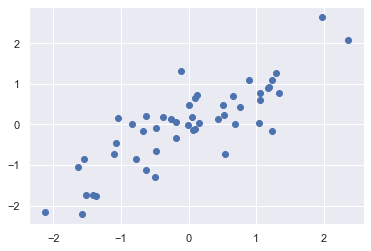

0.9


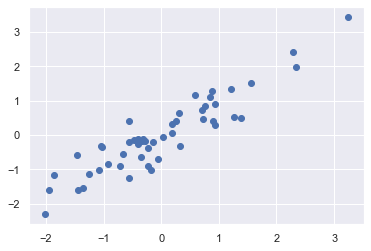

1.0


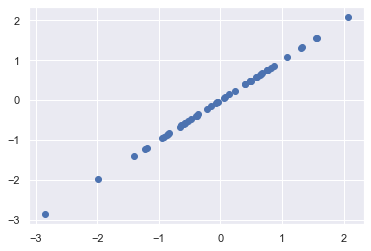

In [39]:
testData = {}
for rho in [(i-10)/10 for i in range(21)]:
    
    if np.abs(rho) < 0.000001:
        rho = 0.0
    print(rho)
    data = generateDataset(rho,n=50)
    testData[rho] = data

In [58]:
with open("testDataBand.json","w") as jsonFile:
    jsonFile.write(json.dumps(testData))

In [40]:
testData

{-1.0: {'data': [{'x': 0.5312458078507701, 'y': -0.5312458041280226},
   {'x': -1.9918652194990338, 'y': 1.9918652263489707},
   {'x': 0.38816457466891885, 'y': -0.38816457828923234},
   {'x': 1.2123965163181545, 'y': -1.2123965322625314},
   {'x': 0.3133014140757089, 'y': -0.3133014060700165},
   {'x': -1.532007195198052, 'y': 1.5320071890631586},
   {'x': -0.001459458190231272, 'y': 0.0014594629211781007},
   {'x': 1.6802200080447802, 'y': -1.6802200138616852},
   {'x': -0.38083010686671215, 'y': 0.38083012043002795},
   {'x': 0.4312851480625071, 'y': -0.43128514789400074},
   {'x': 0.6754120171747641, 'y': -0.6754120182693525},
   {'x': -0.13817470522518427, 'y': 0.13817469936664212},
   {'x': 0.15234081935650493, 'y': -0.15234081709262365},
   {'x': -0.3446011852987275, 'y': 0.34460118145935026},
   {'x': 0.8037619879641524, 'y': -0.8037619850834858},
   {'x': -1.418850842083204, 'y': 1.4188508403034912},
   {'x': -0.5613077657653692, 'y': 0.5613077801605034},
   {'x': 0.2305956638

In [32]:
from decimal import Decimal

[-1.0,
 -0.9,
 -0.8,
 -0.7,
 -0.6,
 -0.5,
 -0.4,
 -0.3,
 -0.2,
 -0.1,
 0.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0]